<a href="https://colab.research.google.com/github/krauseannelize/nb-py-ms-exercises/blob/sprint05/notebooks/s05_pandas_eda/49_exercises_univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 49 | Exercises - Univariate Analysis within EDA

**Exploratory Data Analysis (EDA)** is the process of examining datasets to summarize datasets, identify patterns, detect anomalies, and explore relationships using visual and statistical methods. Types of EDA:

| Type | Variables Analyzed | Relationships Explored | Dependency Structure |
| --- | --- | --- | --- |
| **Univariate**   | One | None | None |
| **Bivariate**    | Two | Yes | One dependent variable |
| **Multivariate** | More than two | Yes | Multiple dependencies |

**Univariate analysis** focuses on a single variable to understand its distribution, central tendency, spread, and data quality. Its goal is to summarize data and reveal basic patterns that guide further analysis.

**Typical Univariate Analysis Questions:**

- **Central value**: What is the typical value? (mean, median, mode)
- **Spread**: How variable are the values? (range, variance, standard deviation)
- **Shape**: What does the distribution look like? (normality, skewness, kurtosis, outliers)
- **Validity**: Are there anomalies or invalid values? (e.g., negative ages, unrealistic sales)

## Statistics

| Method | Description |
| --- | --- |
| **Mean** | The average of a dataset, calculated as the sum of all values divided by the number of values |
| **Median** | The middle value of a dataset when ordered; if even, it's the average of the two middle values |
| **Standard Deviation (std)** | The square root of variance, indicating how much data deviates from the mean |
| **Min** | The smallest value in a dataset |
| **Max** | The largest value in a dataset |

## Analysis with Python

### Importing libraries and dataset

In [32]:
import pandas as pd
import seaborn as sns

# Load the 'mpg' dataset from seaborn
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Mean: Horsepower

In [33]:
# Save `horsepower` column as a Series
horsepower = mpg_df['horsepower']

# Calculate the mean (average) of horsepower
mean_horsepower = round(horsepower.mean(), 2)
print(mean_horsepower)

104.47


### Median: Horsepower

In [34]:
# Calculate the median (middle value) of horsepower
median_horsepower = round(horsepower.median(), 2)
print(median_horsepower)

93.5


### Standard Deviation (STD): Horsepower

In [35]:
# Calculate the standard deviation (measure of spread) of horsepower
std_horsepower = round(horsepower.std(), 2)
print(std_horsepower)

38.49


### Coefficient of Variation (CV): Horsepower

In [36]:
# CV = standard deviation / mean
# A relative measure of variability compared to the mean (unitless)
cv_horsepower = round(std_horsepower / mean_horsepower, 2)
print(cv_horsepower)

# CV = 0.37 → about 37% variability relative to the mean
# Indicates moderate variability in horsepower values

0.37


### Minimum: Horsepower

In [37]:
# Find the minimum value of horsepower
min_horsepower = horsepower.min()
print(min_horsepower)

46.0


### Maximum: Horsepower

In [38]:
# Find the maximum value of horsepower
max_horsepower = horsepower.max()
print(max_horsepower)

230.0


### Quick Summary with `describe()`

In [39]:
# Use the .describe() method to generate summary statistics
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Histograms

A **histogram** divides the range of a numerical variable into intervals (called *bins*) and counts how many observations fall into each bin. It is especially useful for **continuous** or **discrete numerical variables** to:

- Visualize the overall distribution of values  
- Identify patterns such as symmetry, skewness, or modality (peaks)  
- Detect potential outliers or unusual values

In [50]:
# STEP 1 | IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2 | LOAD THE DATASET
# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


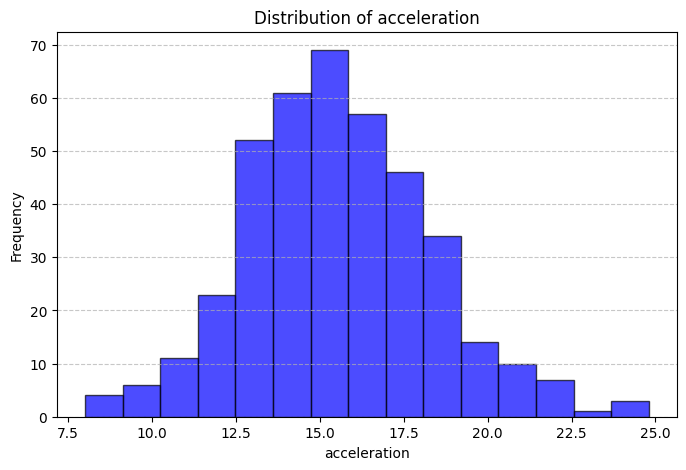

In [51]:
# STEP 3 | CLEAN DATASET
# Select the 'acceleration' column and drop missing values
data_column = df['acceleration'].dropna()

# STEP 4 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(8, 5))

# STEP 5 | CREATE THE HISTOGRAM
# Use `.hist()` to create a histogram; the first argument is the data
# `bins` sets the number of intervals (here: 15)
# `alpha` controls transparency from 0 to 1
# `edgecolor` specifies the outline of the bars
# `color` specifies the bar color
plt.hist(data_column, bins=15, alpha=0.7, edgecolor='black', color='blue')

# STEP 6 | ADD LABELS, TITLE & GRID
# Add axis labels and chart title
plt.xlabel('acceleration')
plt.ylabel('Frequency')
plt.title('Distribution of acceleration')

# Add a grid for readability
# `axis` determines which axis has grid lines
# `linestyle` specifies the line style
# `alpha` controls transparency from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# STEP 7 | DISPLAY THE HISTOGRAM
plt.show()

## Density Plots

A **density plot** is a smooth curve that shows how data is distributed, expressed as _probability density_.  
Similar to a histogram, it highlights the overall shape of the distribution, but uses a continuous line instead of bars.

- The **area under the curve = 1**, representing the full probability distribution.  
- The **Y‑axis** shows density (not raw counts), so the height of the curve indicates how tightly values cluster around a point.  

**Theoretical Distribution**: a mathematical model assumed _before_ data collection (e.g., normal distribution).  
**Density Plot**: a data‑driven estimate _after_ data collection, showing how the observed data fits—or deviates from—the theoretical expectation.

In [65]:
# STEP 1 | IMPORT LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2 | LOAD THE DATASET
# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


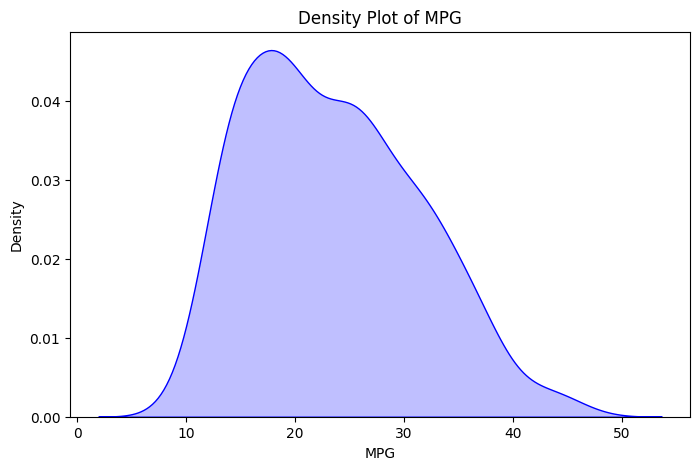

In [66]:
# STEP 3 | CLEAN DATASET
# Select the 'mpg' column and drop missing values
data = df['mpg'].dropna()

# STEP 4 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(8, 5))

# STEP 5 | CREATE THE DENSITY PLOT
# Use `sns.kdeplot()` to generate a kernel density estimation (KDE) plot
# `x=data` specifies the variable to plot
# `bw_adjust` controls the smoothing (bandwidth) - higher = smoother curve
# `color` sets the line color
# `fill=True` shades the area under the curve
sns.kdeplot(x=data, bw_adjust=1, color="blue", fill=True)

# STEP 6 | ADD LABELS & TITLE
# Add axis labels and chart title
plt.xlabel("MPG")
plt.ylabel("Density")
plt.title("Density Plot of MPG")

# STEP 7 | DISPLAY THE PLOT
plt.show()

## Boxplots

A **boxplot** or **box‑and‑whisker plot** is a compact way to visualize the distribution of a _numerical variable_. It summarizes key statistics (**median, quartiles, spread, and outliers**) making it easy to compare distributions across groups.

| Element | Description |
| --- | --- |
| **Box** | Spans the interquartile range (IQR) from Q1 (25th percentile) to Q3 (75th percentile), showing the middle 50% of the data |
| **Median** | Line inside the box representing the 50th percentile (Q2), the dataset’s midpoint |
| **Whiskers** | Extend to the smallest and largest values within 1.5 × IQR of Q1 and Q3, showing the typical spread |
| **Outliers** | Points beyond the whiskers, representing unusually low or high values |

In [1]:
# STEP 1 | IMPORT LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2 | LOAD THE DATASET
# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


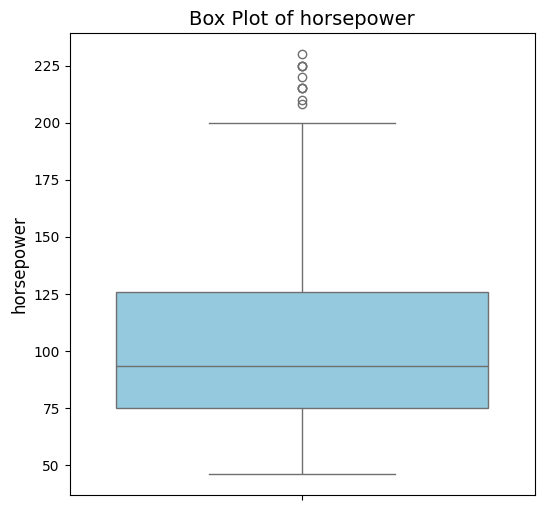

In [10]:
# STEP 3 | CLEAN DATASET
# Select the 'horsepower' column and drop missing values
data = df['horsepower'].dropna()

# STEP 4 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(6, 6))

# STEP 5 | CREATE THE BOX PLOT
# Use `sns.boxplot()` to generate a box plot
# `y=data` specifies the variable to plot on the y-axis
# `color` sets the line color
sns.boxplot(y=data, color="skyblue")

# STEP 6 | ADD LABELS & TITLE
# Add axis labels and chart title
column_name = 'horsepower' # Define column_name
plt.title(f"Box Plot of {column_name}", fontsize=14)
plt.ylabel(column_name, fontsize=12) # Change xlabel to ylabel

# STEP 7 | DISPLAY THE PLOT
plt.show()

## Violin Plots

A **violin plot** combines a **box plot** and **density plot**. It shows both summary statistics (median, quartiles, whiskers, outliers) and the full distribution shape, making it useful for visualizing **distribution, spread, skewness, and multimodality (multiple peaks)** in a dataset, especially when comparing groups.

- **Continuous Variables**: prices, ratings, salaries, etc.
- **Categorical Comparisons**: compare distributions of a continuous variable across groups (e.g. sales by region)

| Component | Description |
| --- | --- |
| **Violin Body** | Width shows data density (wider = higher concentration) |
| **Median (dot)** | White dot inside shows 50th percentile (central value) |
| **IQR (box)** | Box within the violin spanning Q1 (25%) to Q3 (75%), the middle 50% of data |
| **Whiskers** | Lines extending from box to the smallest/largest values |
| **Outliers** | Individual points beyond the whiskers, representing extreme values |

In [34]:
# STEP 1 | IMPORT LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2 | LOAD THE DATASET
# Load the 'mpg' dataset from Seaborn
mpg_data = sns.load_dataset("mpg")
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


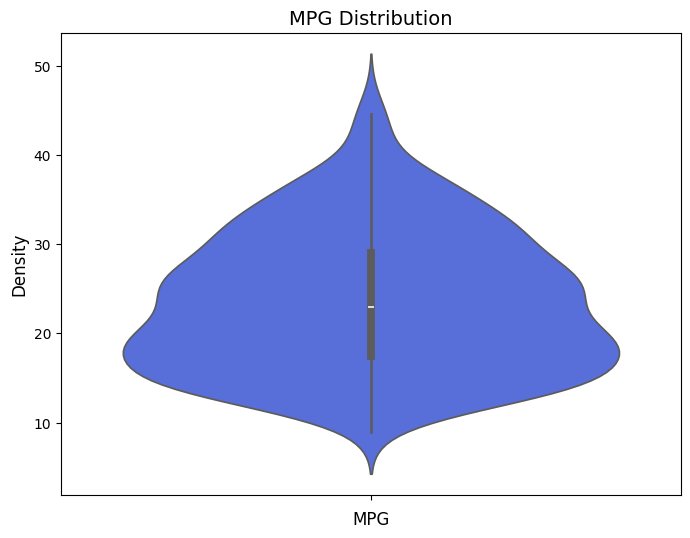

In [26]:
# STEP 3 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(8, 6))

# STEP 4 | CREATE THE VIOLIN PLOT
# `sns.violinplot()` creates a violin plot
# `color` sets the line color
sns.violinplot(data=mpg_data['mpg'], color="#4361EE")

# STEP 5 | ADD LABELS & TITLE
plt.title("MPG Distribution", fontsize=14)
plt.xlabel("MPG", fontsize=12)
plt.ylabel("Density", fontsize=12)

# STEP 6 | DISPLAY THE PLOT
plt.show()

## Bar Plot

A **bar plot** or **bar chart** is used to represent categorical data with rectangular bars. The bar height is proportional to the value or frequency of the category it represents.

In [35]:
# STEP 1 | IMPORT LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2 | LOAD THE DATASET
# Load the 'penguins' dataset from Seaborn
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


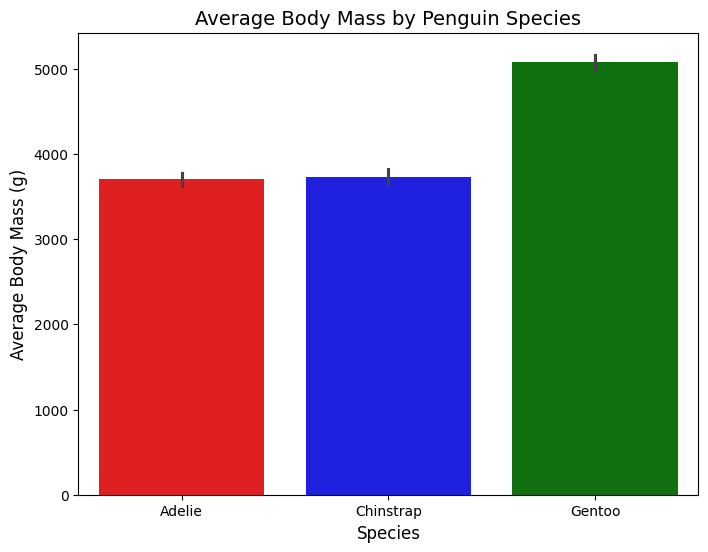

In [38]:
# STEP 3 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(8, 6))

# STEP 4 | DEFINE COLOR PALETTE
# Create a list of colors to use for the bars
colors = ["red", "blue", "green"]

# STEP 5 | CREATE THE BAR PLOT
# `sns.barplot()` creates a bar plot
# `data` = DataFrame containing the variables
# `x` = categorical variable (species)
# `y` = numerical variable (body mass in grams)
# `hue` explicitly map colors to 'species' categories
# `palette` = list of colors for the bars
sns.barplot(data=penguins, x="species", y="body_mass_g", hue='species', palette=colors)

# STEP 6 | ADD LABELS & TITLE
plt.title("Average Body Mass by Penguin Species", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Average Body Mass (g)", fontsize=12)

# STEP 7 | DISPLAY THE PLOT
plt.show()

## Line Plots

A **line plot** or **line chart** is used to represent data points on a _continuous scale_. It is ideal for showing trends or patterns over time or continuous intervals.

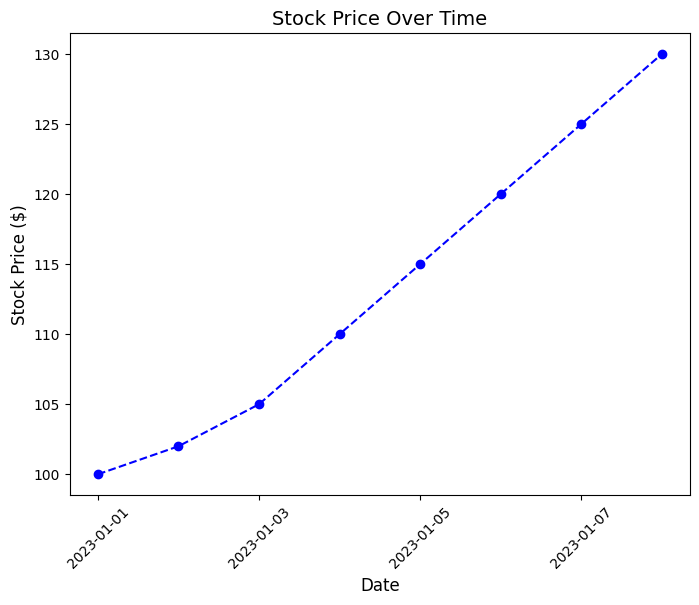

In [50]:
# STEP 1 | IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2 | CREATE SAMPLE DATA
# Generate a sample time series data for stock prices
dates = pd.date_range("2023-01-01", periods=8, freq="D")
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]

# STEP 3 | BUILD DATAFRAME
# Create a DataFrame with dates and stock prices
stock_data = pd.DataFrame({"Date": dates, "Stock Price": stock_prices})

# STEP 4 | CREATE PLOT FIGURE
# `.figure()` creates a new figure for plotting
# `figsize=(width, height)` sets the size in inches
plt.figure(figsize=(8, 6))

# STEP 5 | CREATE THE LINE PLOT
# `.plot()` creates a line plot
# First argument = x-axis values, second argument = y-axis values
# `linestyle` sets the line style (e.g., solid '-', dashed '--', dotted ':')
# `color` sets the line color
# `marker` sets the symbol used to mark each data point (e.g., 'o' for circles)
plt.plot(stock_data["Date"], stock_data["Stock Price"], linestyle="--", color="blue", marker="o")

# STEP 6 | FORMAT X-AXIS TICKS
# Show every second date and rotate labels for readability
plt.xticks(stock_data["Date"][::2], rotation=45)

# STEP 7 | ADD LABELS & TITLE
plt.title("Stock Price Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price ($)", fontsize=12)

# STEP 8 | DISPLAY THE PLOT
plt.show()

## Exercise 1

Using the `diamonds` dataset stored in the `diamonds_df` variable, compute the **mean, median, mode, min, max, and standard deviation** for the `price` column.

In [47]:
import seaborn as sns
import pandas as pd

diamonds_df = sns.load_dataset('diamonds')

# Calculate the mean of the 'price' column
mean_price = diamonds_df["price"].mean()
print(f"Mean Price: {mean_price}")

# Calculate the median of the 'price' column
median_price = diamonds_df["price"].median()
print(f"Median Price: {median_price}")

# Calculate the mode of the 'price' column
mode_price = diamonds_df["price"].mode()
print(f"Mode Price: {mode_price.iloc[0]}")

# Calculate the minimum price
min_price = diamonds_df["price"].min()
print(f"Minimum Price: {min_price}")

# Calculate the maximum price
max_price = diamonds_df["price"].max()
print(f"Maximum Price: {max_price}")

# Calculate the standard deviation of the 'price' column
std_price = diamonds_df["price"].std()
print(f"Standard Deviation: {std_price}")

Mean Price: 3932.799721913237
Median Price: 2401.0
Mode Price: 605
Minimum Price: 326
Maximum Price: 18823
Standard Deviation: 3989.4397381463023


## Exercise 2

Using the `tips` dataset stored in the `tips_df` variable, compute the **mean, median, mode, min, max, and standard deviation** for the `total_bill` column.

In [48]:
import seaborn as sns
import pandas as pd

tips_df = sns.load_dataset('tips')

# Calculate the mean of the 'total_bill' column
mean_bill = tips_df["total_bill"].mean()
print(f"Mean Total Bill: {mean_bill}")

# Calculate the median of the 'total_bill' column
median_bill = tips_df["total_bill"].median()
print(f"Median Total Bill: {median_bill}")

# Calculate the mode of the 'total_bill' column
mode_bill = tips_df["total_bill"].mode()
print(f"Mode Total Bill: {mode_bill.iloc[0]}")

# Calculate the minimum total bill
min_bill = tips_df["total_bill"].min()
print(f"Minimum Total Bill: {min_bill}")

# Calculate the maximum total bill
max_bill = tips_df["total_bill"].max()
print(f"Maximum Total Bill: {max_bill}")

# Calculate the standard deviation of the 'total_bill' column
std_bill = tips_df["total_bill"].std()
print(f"Standard Deviation: {std_bill}")

Mean Total Bill: 19.78594262295082
Median Total Bill: 17.795
Mode Total Bill: 13.42
Minimum Total Bill: 3.07
Maximum Total Bill: 50.81
Standard Deviation: 8.902411954856856


## Exercise 3

Using the `tips` dataset stored in the `tips_df` variable, compare the **standard deviation** of `tip` and `total_bill` to determine which one has a higher spread of values.

In [49]:
import seaborn as sns
import pandas as pd

tips_df = sns.load_dataset('tips')

# Calculate the mean of the 'total_bill' column
mean_bill = tips_df["total_bill"].mean()
print(f"Mean Total Bill: {mean_bill}")

# Calculate standard deviation for the 'tip' column
std_tip = tips_df["tip"].std()
print(f"Standard Deviation of Tip: {std_tip}")

# Calculate standard deviation for the 'total_bill' column
std_bill = tips_df["total_bill"].std()
print(f"Standard Deviation of Total Bill: {std_bill}")

# Compare standard deviation for 'tip' and 'total_bill' columns
if std_tip > std_bill:
    print("The 'tip' column has a higher spread of values.")
elif std_tip < std_bill:
    print("The 'total_bill' column has a higher spread of values.")

Mean Total Bill: 19.78594262295082
Standard Deviation of Tip: 1.3836381890011826
Standard Deviation of Total Bill: 8.902411954856856
The 'total_bill' column has a higher spread of values.


## Exercise 4

Using the `mpg` dataset, create a histogram for the `mpg` column.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


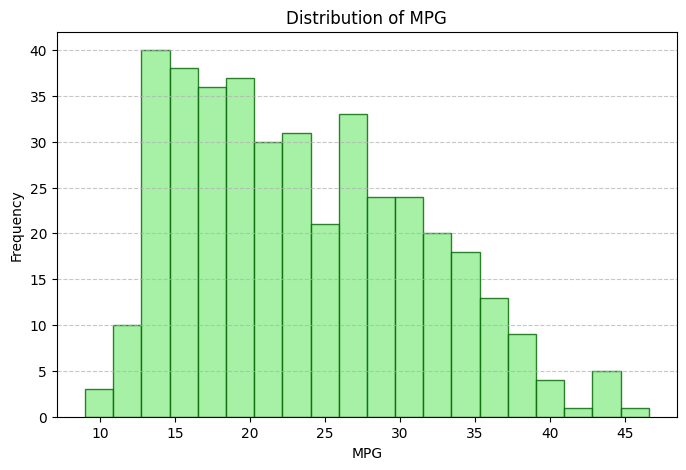

In [54]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
print(df.head())

# Select the 'mpg' column and remove missing values
data_column = df['mpg'].dropna()

# Create a figure for the histogram
plt.figure(figsize=(8, 5))

# Create a histogram for the selected data column
plt.hist(data_column, bins=20, alpha=0.8, edgecolor='darkgreen', color='lightgreen')

# Add labels and title to the plot
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.title("Distribution of MPG")

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

## Exercise 5

Using the `mpg` dataset:

- create two histograms: one for `mpg` and another for `acceleration`,
- then compare their distributions

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino   



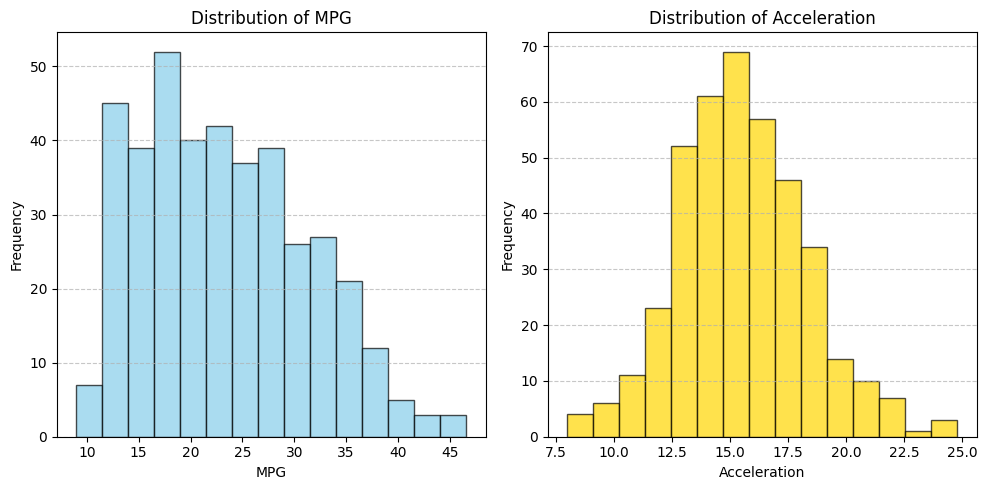

In [60]:
## Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
print(df.head(), "\n")

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 5))

# Create the first subplot for mpg
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.hist(df['mpg'].dropna(), bins=15, edgecolor='black', alpha=0.7, color="skyblue", label="mpg")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.title("Distribution of MPG")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create the second subplot for acceleration
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.hist(df['acceleration'].dropna(), bins=15, edgecolor='black', alpha=0.7, color="gold", label="acceleration")
plt.xlabel("Acceleration")
plt.ylabel("Frequency")
plt.title("Distribution of Acceleration")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 6

Using the `penguins` dataset, create a histogram for the `flipper_length_mm` column.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



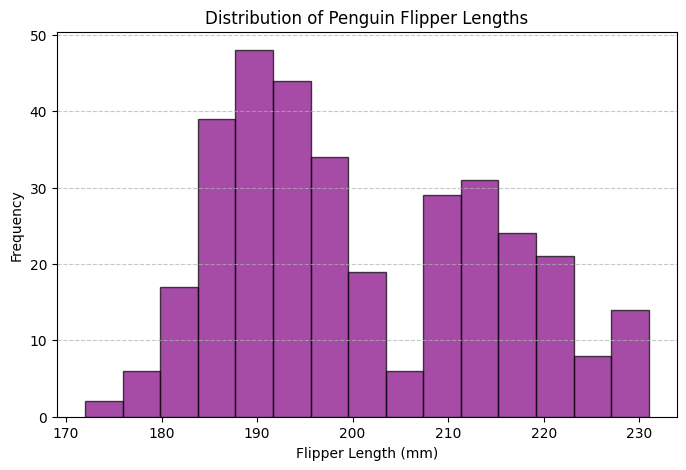

In [64]:
## Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'penguins' dataset from seaborn and preview data
df = sns.load_dataset("penguins")
print(df.head(), "\n")

# Select the 'flipper_length_mm' column and remove missing values
df['flipper_length_mm'] = df['flipper_length_mm'].dropna()

# Create a figure for the histogram
plt.figure(figsize=(8, 5))

# Create a histogram for the selected data column
plt.hist(df['flipper_length_mm'], bins=15, edgecolor='black', alpha=0.7, color='purple')

# Add labels and title to the plot
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Penguin Flipper Lengths")

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

## Exercise 7

Using the `mpg` dataset, create a density plot for the `acceleration` column.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino   



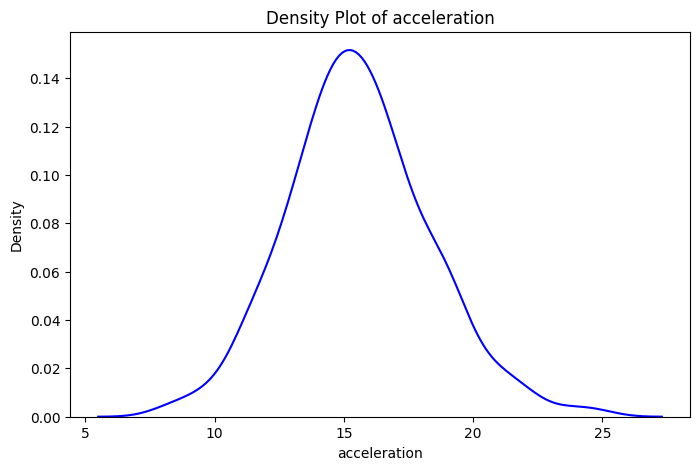

In [67]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
print(df.head(), "\n")

# Select the 'acceleration' column and remove missing values
data = df['acceleration'].dropna()

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 5))

# Generate a density plot using Seaborn
sns.kdeplot(x=data, bw_adjust=1, color="blue")

# Add labels and title to describe the plot
plt.xlabel("acceleration")
plt.ylabel("Density")
plt.title("Density Plot of acceleration")

# Display the density plot
plt.show()

## Exercise 8

Using the `penguins` dataset, create a density plot for the `flipper_length_mm` column.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



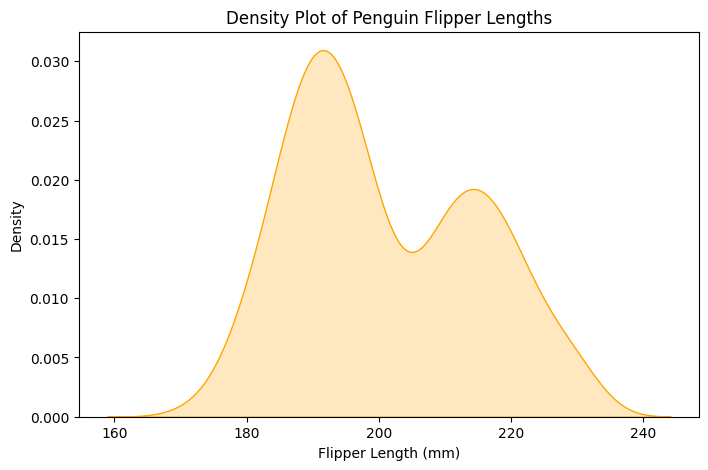

In [69]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'penguins' dataset from seaborn and preview data
df = sns.load_dataset("penguins")
print(df.head(), "\n")

# Select the 'flipper_length_mm' column and remove missing values
data = df['flipper_length_mm'].dropna()

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 5))

# Generate a density plot using Seaborn
sns.kdeplot(x=data, bw_adjust=1, color="orange", fill=True)

# Add labels and title to describe the plot
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Density")
plt.title("Density Plot of Penguin Flipper Lengths")

# Display the density plot
plt.show()

## Exercise 9

Using the `mpg` dataset, create a density plot for the `mpg` column.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino   



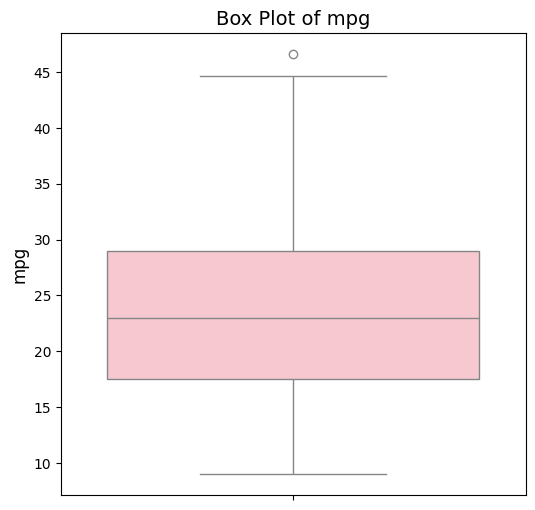

In [15]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
print(df.head(), "\n")

# Select the 'mpg' column and remove missing values
column_name = "mpg"
data = df['mpg'].dropna()

# Create a figure for the box plot
plt.figure(figsize=(6, 6))

# Create a box plot for the selected data column
sns.boxplot(y=data, color="pink")

# Add labels and title to the plot
plt.title(f"Box Plot of {column_name}", fontsize=14)
plt.ylabel(column_name, fontsize=12)

# Display the box plot
plt.show()

## Exercise 10

Using the `mpg` dataset:

- create two boxplots: one for `mpg` (miles per gallon) and another for `horsepower`,
- then compare their distributions side by side.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino   



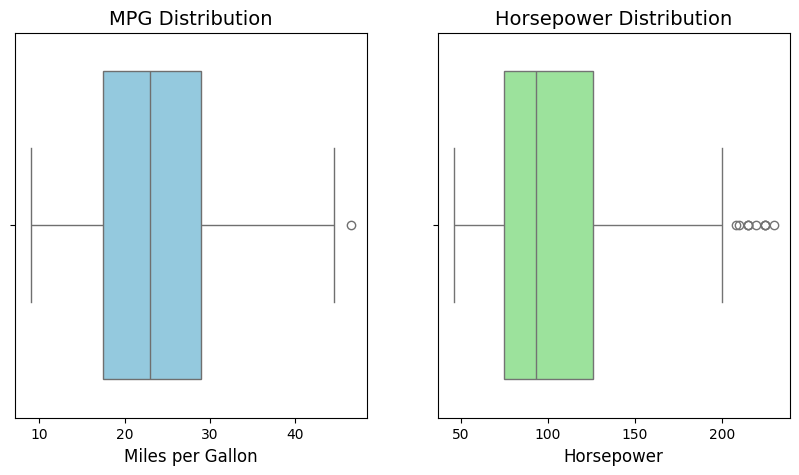

In [19]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'mpg' dataset from seaborn and preview data
df = sns.load_dataset("mpg")
print(df.head(), "\n")

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(10, 5))

# Create the first subplot for mpg
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(x=df["mpg"], color="skyblue", orient="h")
plt.title("MPG Distribution", fontsize=14)
plt.xlabel("Miles per Gallon", fontsize=12)

# Create the second subplot for horsepower
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(x=df["horsepower"], color="lightgreen", orient="h")
plt.title("Horsepower Distribution", fontsize=14)
plt.xlabel("Horsepower", fontsize=12)

# Show the plot
plt.show()

## Exercise 11

Using the `penguins` dataset, create a box plot for the `flipper_length_mm` column.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



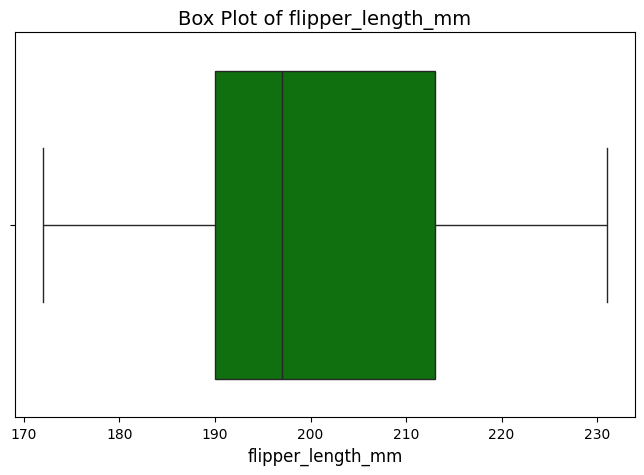

In [20]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'penguins' dataset from seaborn and preview data
df = sns.load_dataset("penguins")
print(df.head(), "\n")

# Select the 'flipper_length_mm' column and remove missing values
column_name = "flipper_length_mm"
data = df['flipper_length_mm'].dropna()

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 5))

# Generate a box plot using Seaborn
sns.boxplot(x=data, color="green")

# Add labels and title to describe the plot
plt.title(f"Box Plot of {column_name}", fontsize=14)
plt.xlabel(column_name, fontsize=12)

# Display the box plot
plt.show()

## Exercise 12

Using the `penguins` dataset, create a violin plot for the `flipper_length_mm` column.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



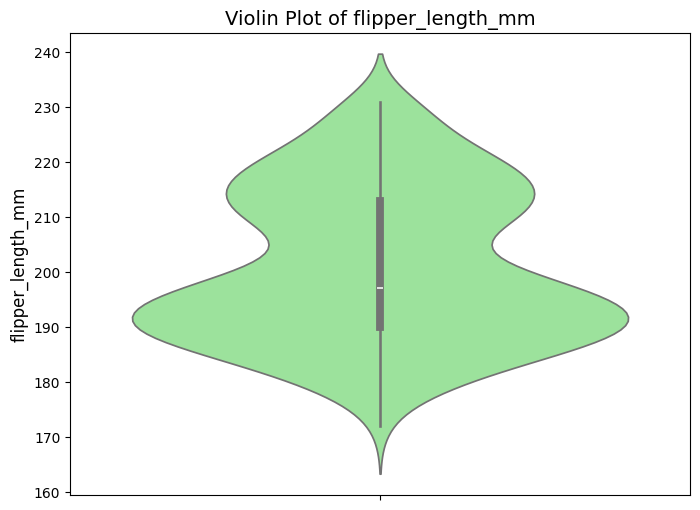

In [28]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'penguins' dataset from seaborn and preview data
df = sns.load_dataset("penguins")
print(df.head(), "\n")

# Select the 'flipper_length_mm' column and remove missing values
column_name = "flipper_length_mm"
data = df['flipper_length_mm'].dropna()

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 6))

# Generate a box plot using Seaborn
sns.violinplot(y=data, color="lightgreen")

# Add labels and title to describe the plot
plt.title(f"Violin Plot of {column_name}", fontsize=14)
plt.ylabel(column_name, fontsize=12)

# Display the violin plot
plt.show()

## Exercise 13

Using the `penguins` dataset, create a violin plot for the `bill_length_mm` column.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



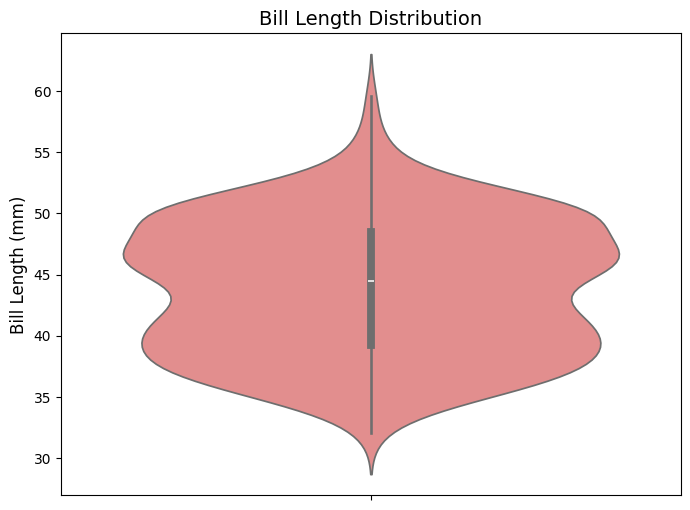

In [31]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'penguins' dataset from seaborn and preview data
df = sns.load_dataset("penguins")
print(df.head(), "\n")

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 6))

# Generate a box plot using Seaborn
sns.violinplot(y=df['bill_length_mm'].dropna(), color="lightcoral")

# Add labels and title to describe the plot
plt.title("Bill Length Distribution", fontsize=14)
plt.ylabel("Bill Length (mm)", fontsize=12)

# Display the violin plot
plt.show()

## Exercise 14

Using the `penguins` dataset, create a bar plot that compares the `average body mass` of penguins by `species`.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



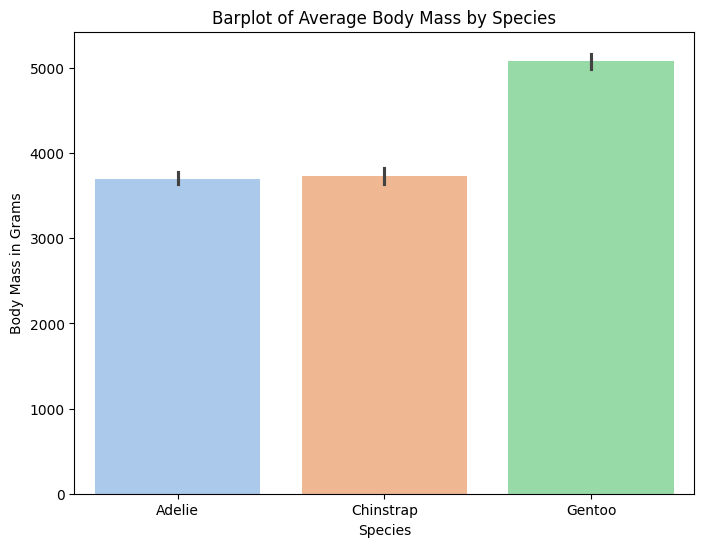

In [45]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the 'penguins' dataset from seaborn and preview data
penguins = sns.load_dataset("penguins")
print(penguins.head(), "\n")

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(data=penguins, x='species', y='body_mass_g', estimator=np.mean, hue='species', palette='pastel')

# Add title and labels to the plot
plt.title('Barplot of Average Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass in Grams')

# Display the plot
plt.show()

## Exercise 15

Using the `penguins` dataset, create a bar plot with custom colors for each bar.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   



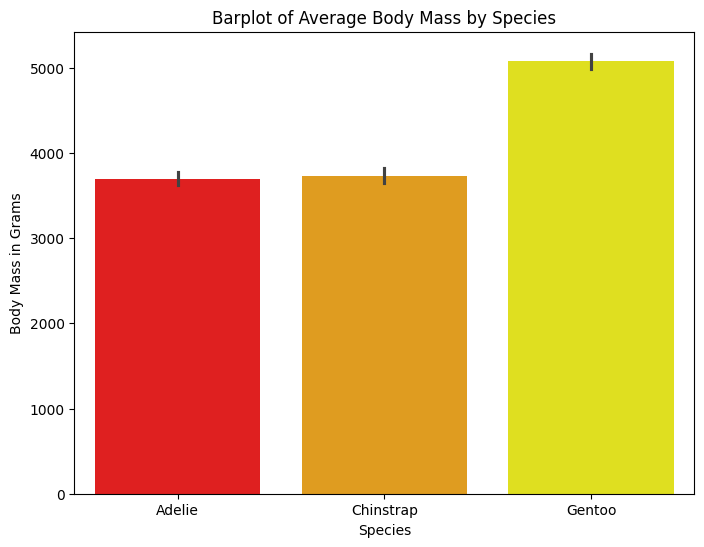

In [44]:
## Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the 'penguins' dataset from seaborn and preview data
penguins = sns.load_dataset("penguins")
print(penguins.head(), "\n")

# Specify the custom colors for each bar
colors = ['red', 'orange', 'yellow']

# Create a figure for the plot and set its size
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(data=penguins, x='species', y='body_mass_g', estimator=np.mean, hue='species', palette=colors)

# Add title and labels to the plot
plt.title('Barplot of Average Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass in Grams')

# Display the plot
plt.show()

## Exercise 16

Create a simple line plot showing the change in stock price over days for the sample dataset `stock_data`.

```python
dates = pd.date_range("2023-01-01", periods=8, freq="D")
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]
stock_data = pd.DataFrame({"Date": dates, "Stock Price": stock_prices})
```

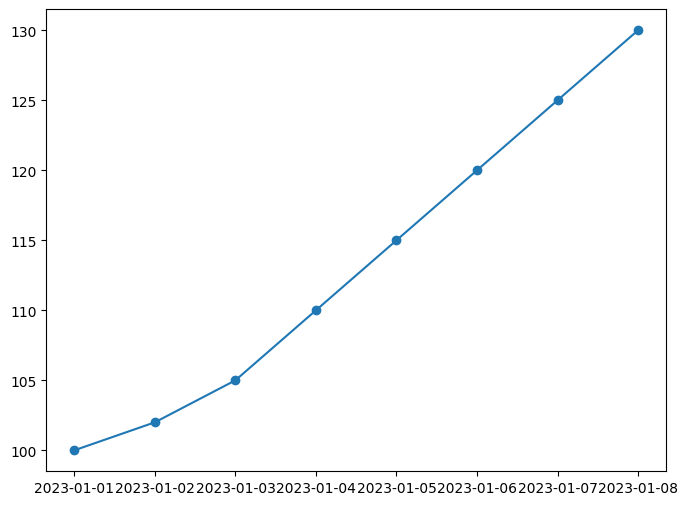

In [51]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample time series data for stock prices
dates = pd.date_range("2023-01-01", periods=8, freq="D")
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]

# Create a DataFrame with dates and stock prices
stock_data = pd.DataFrame({"Date": dates, "Stock Price": stock_prices})

# Create the figure and line plot
plt.figure(figsize=(8, 6))
plt.plot(stock_data['Date'], stock_data['Stock Price'], marker='o')

# Display the plot
plt.show()

## Exercise 17

Create a simple line plot showing the change in stock price over days for the sample dataset `stock_data`, creating a title and adding labeling.

```python
dates = pd.date_range("2023-01-01", periods=8, freq="D")
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]
stock_data = pd.DataFrame({"Date": dates, "Stock Price": stock_prices})
```

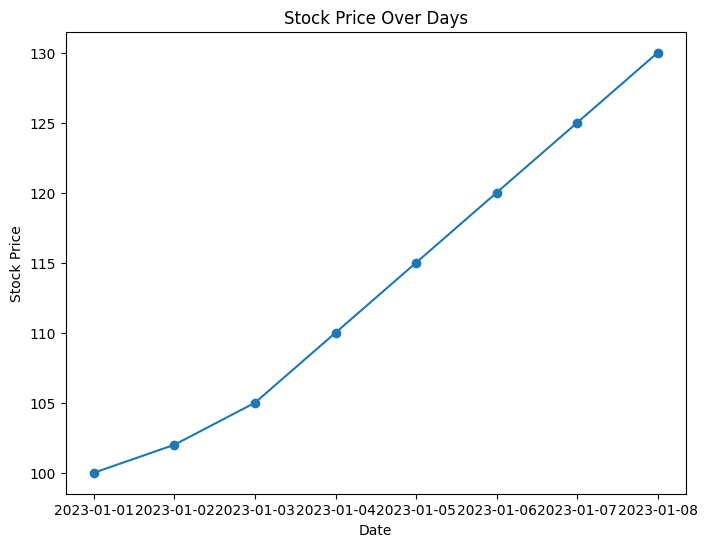

In [52]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample time series data for stock prices
dates = pd.date_range("2023-01-01", periods=8, freq="D")
stock_prices = [100, 102, 105, 110, 115, 120, 125, 130]

# Create a DataFrame with dates and stock prices
stock_data = pd.DataFrame({"Date": dates, "Stock Price": stock_prices})

# Create the figure and line plot
plt.figure(figsize=(8, 6))
plt.plot(stock_data['Date'], stock_data['Stock Price'], marker='o')

# Add title and labels
plt.title("Stock Price Over Days")
plt.xlabel("Date")
plt.ylabel("Stock Price")

# Display the plot
plt.show()